<a href="https://colab.research.google.com/github/radianmalik9/PCVK_Genap_2021/blob/main/Week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounted at /content/drive
Gamma correction pada citra
---------------------------------
Masukkan nilai gamma: 5


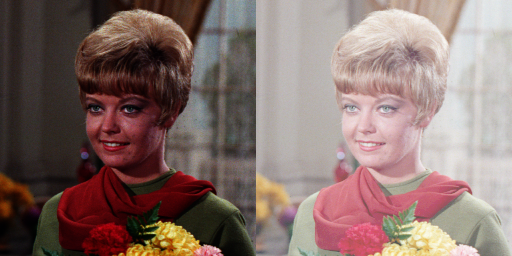

In [1]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow #for image 
from google.colab import drive
import matplotlib.pylab as plt
drive.mount('/content/drive')

print('Gamma correction pada citra')
print('---------------------------------')
try:
  gamma = int(input('Masukkan nilai gamma: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/female.tiff')
gamma_image = np.zeros(original.shape, original.dtype)

  #akses perpiksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      gamma_image[y,x,c] = np.clip(255*pow(original[y,x,c]/255,(1/gamma)),0,255)

final_frame = cv.hconcat((original, gamma_image))
cv2_imshow(final_frame)

Gamma correction pada citra
---------------------------------
Masukkan nilai bit depth: 2


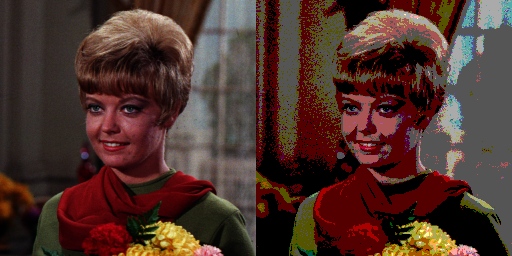

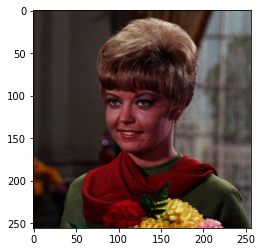

In [2]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow #for image 
from google.colab import drive
import matplotlib.pylab as plt

img = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/female.tiff')
image = cv.cvtColor(img,cv.COLOR_BGR2RGB)
plt.imshow(image)

original = cv.cvtColor(image,cv.COLOR_BGR2RGB)
gamma_image = np.zeros(original.shape, original.dtype)


print('Gamma correction pada citra')
print('---------------------------------')
try:
  bd = float(input('Masukkan nilai bit depth: '))
except ValueError:
  print('Error, not a number')
bit=2**bd
level = 255/(bit-1)

  #akses perpiksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      gamma_image[y,x,c] = np.clip(round(original[y,x,c]/level)*level, 0, 255)

final_frame = cv.hconcat((original, gamma_image))
cv2_imshow(final_frame)

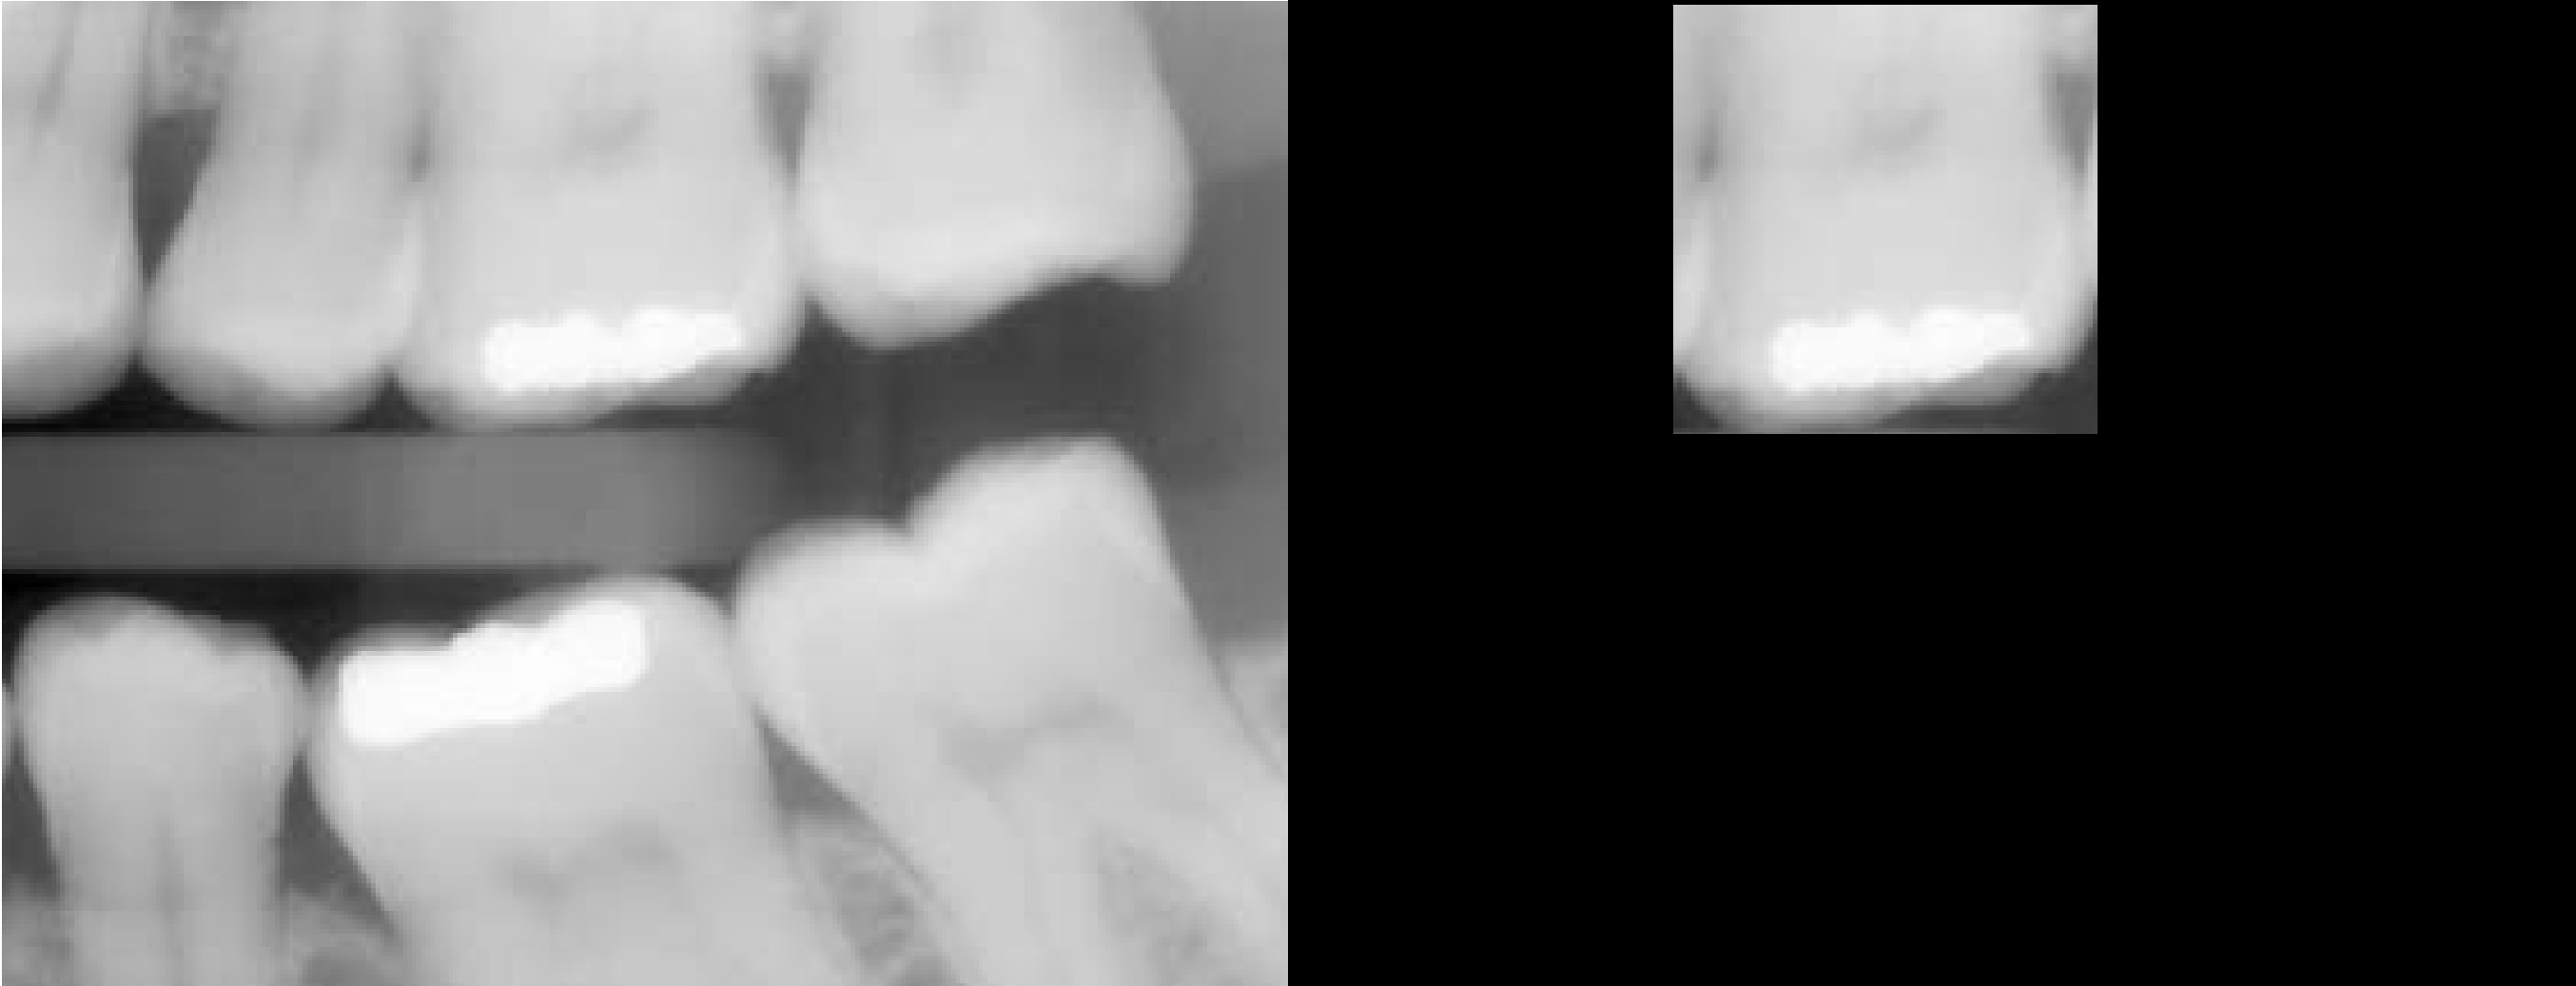

In [4]:
img = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/teeth.jpg')
mask = np.zeros(img.shape,dtype=np.uint8)
mask = cv.rectangle(mask,pt1=(405,5),pt2=(850,455),color=(255,255,255),thickness=-1)

result = img & mask

mask1 = cv.rectangle(mask,pt1=(405,5),pt2=(850,455),color=(255,255,255),thickness=-1)

result = img & mask1

final_frame = cv.hconcat((img, result))
cv2_imshow(final_frame)

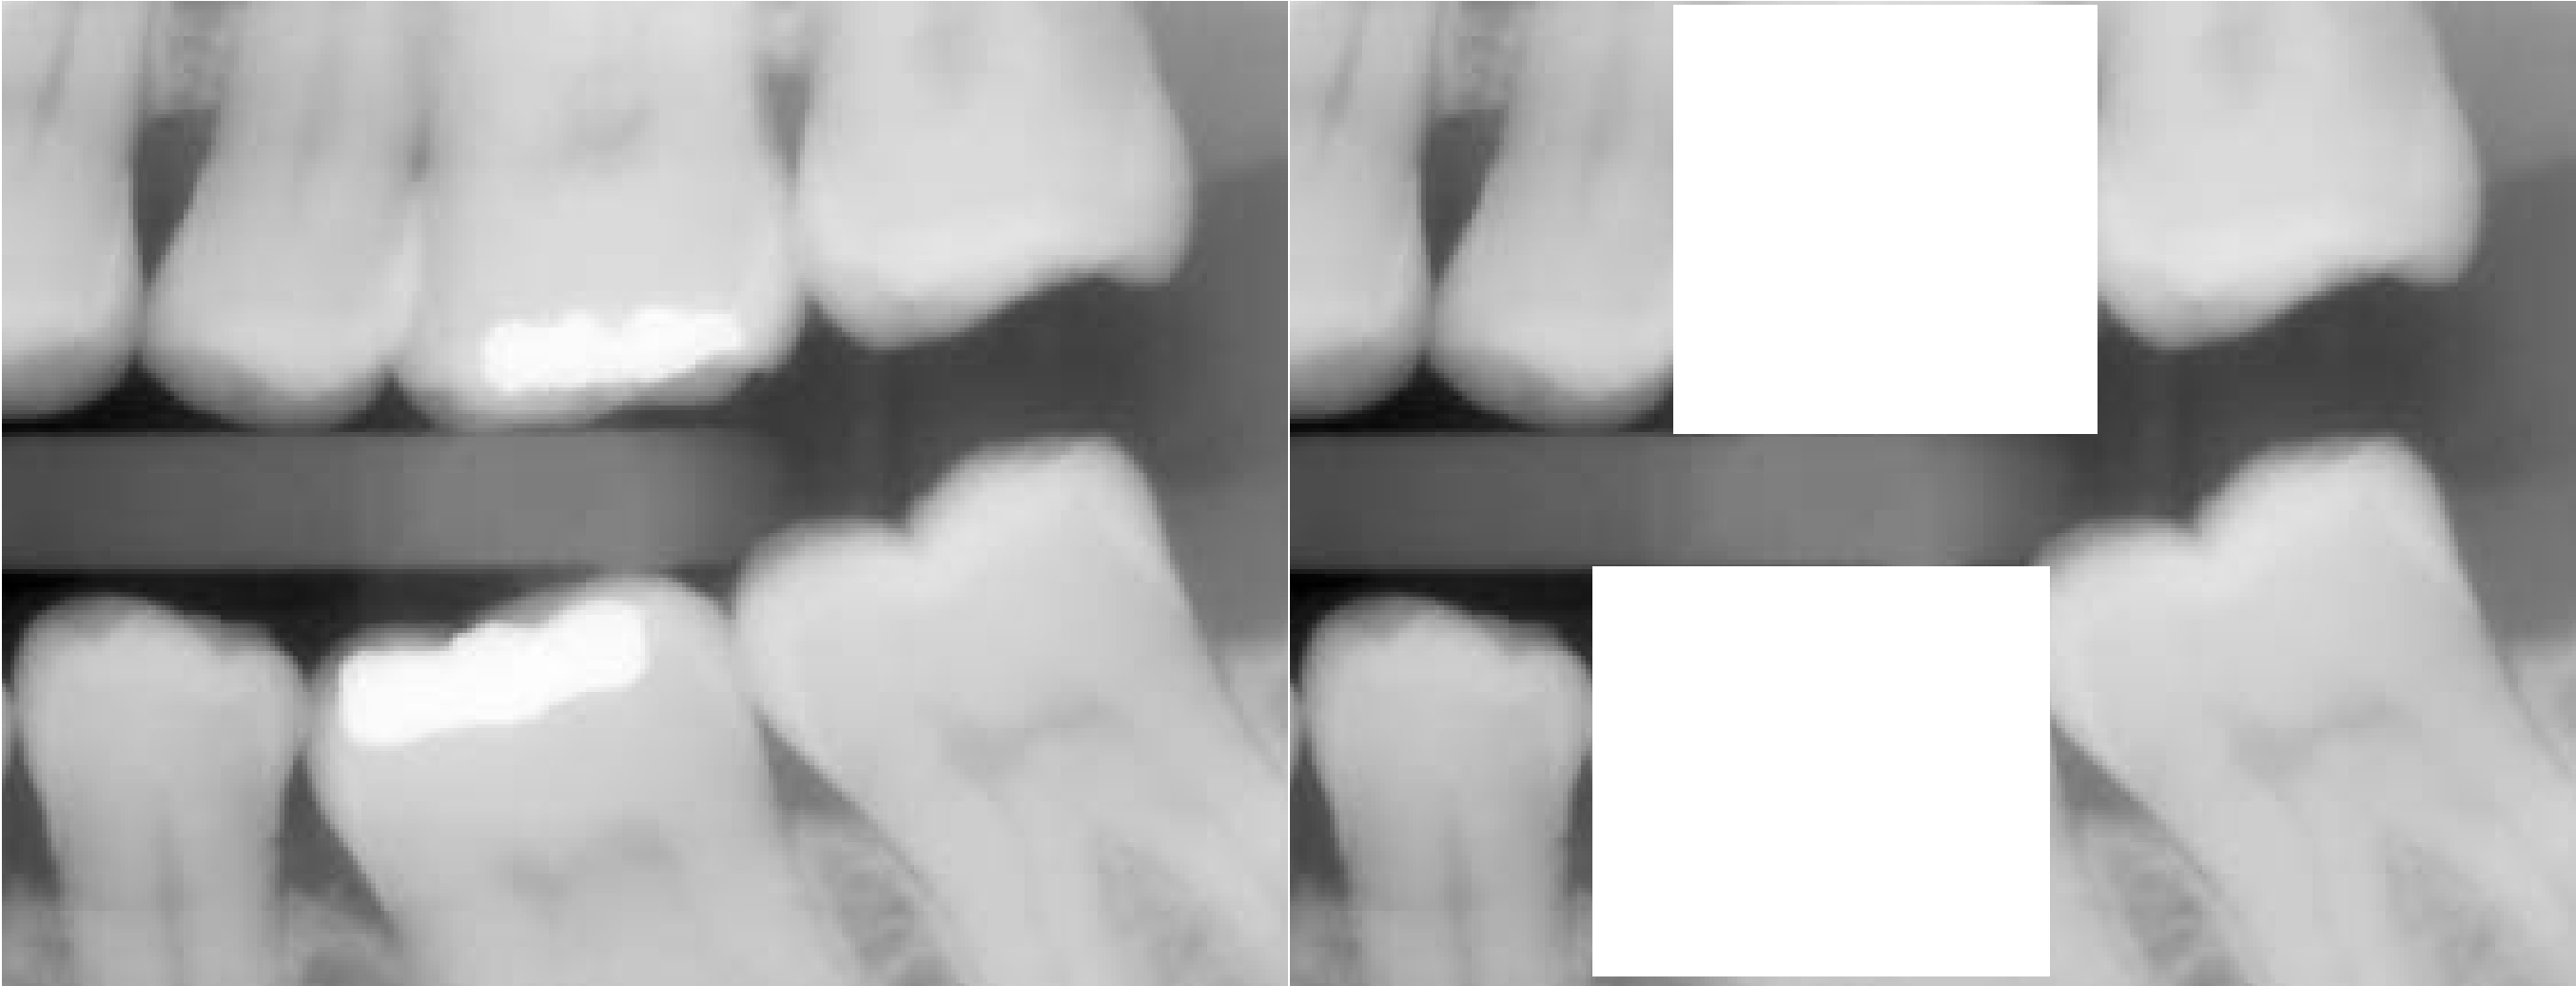

In [5]:
#OR
img = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/teeth.jpg')

mask_or = np.zeros(img.shape,dtype=np.uint8)
mask_or = cv.rectangle(mask_or,pt1=(320,595),pt2=(800,1025),color=(255,255,255),thickness=-1)

result = img | mask_or

mask_or1 = cv.rectangle(mask_or,pt1=(405,5),pt2=(850,455),color=(255,255,255),thickness=-1)

result_or1 = img | mask_or1

final_frame = cv.hconcat((img, result_or1))
cv2_imshow(final_frame)

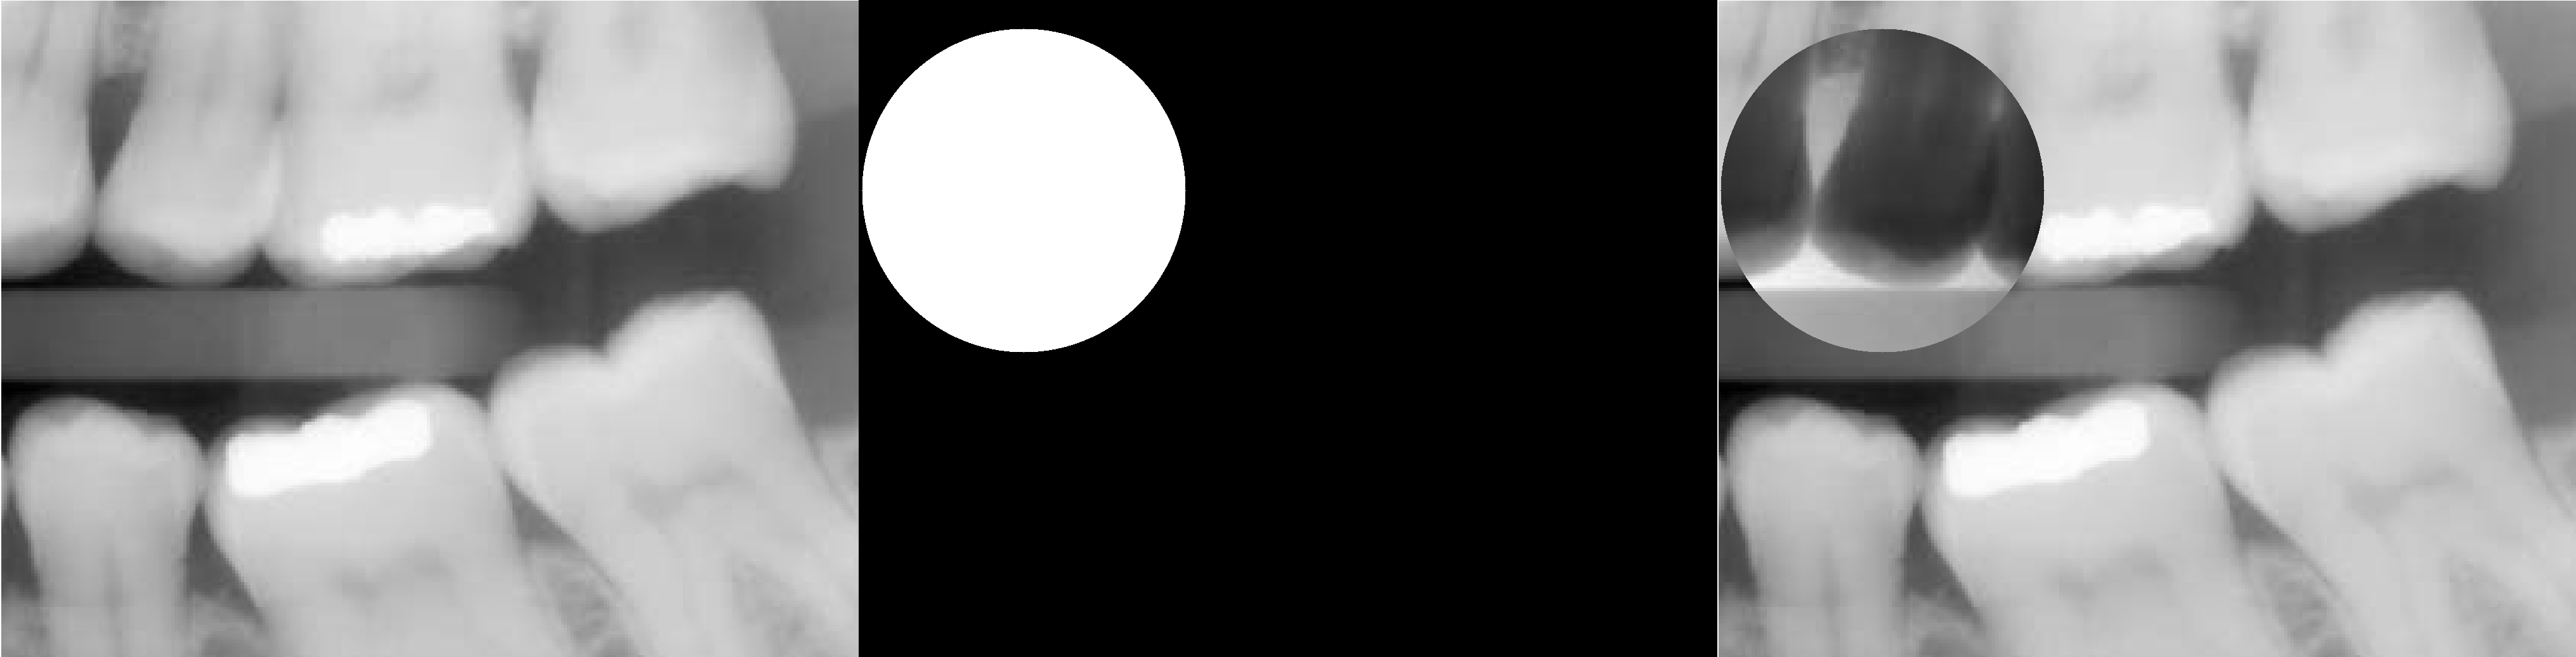

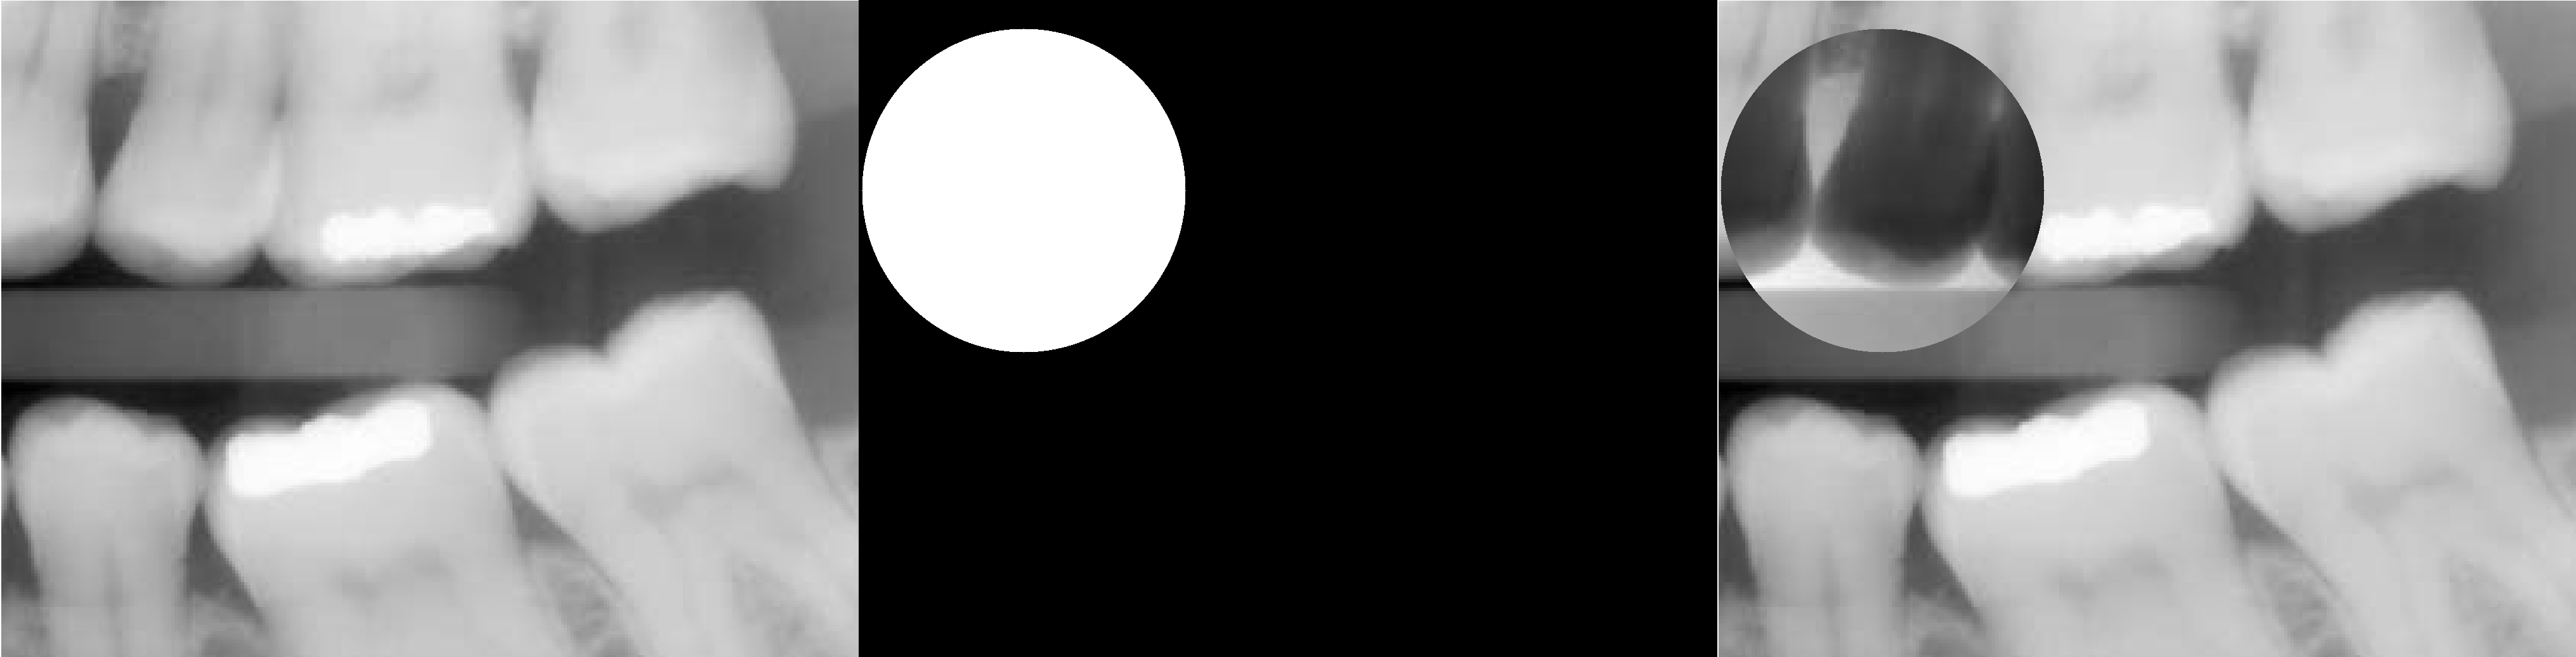

In [7]:
#XOR
img = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/teeth.jpg')

mask = np.zeros(img.shape,dtype=np.uint8)
mask = cv.circle(mask,(260,300), 255, (255,255,255), -1)

result = img ^ mask

final_frame = cv.hconcat((img, mask, result))
cv2_imshow(final_frame)

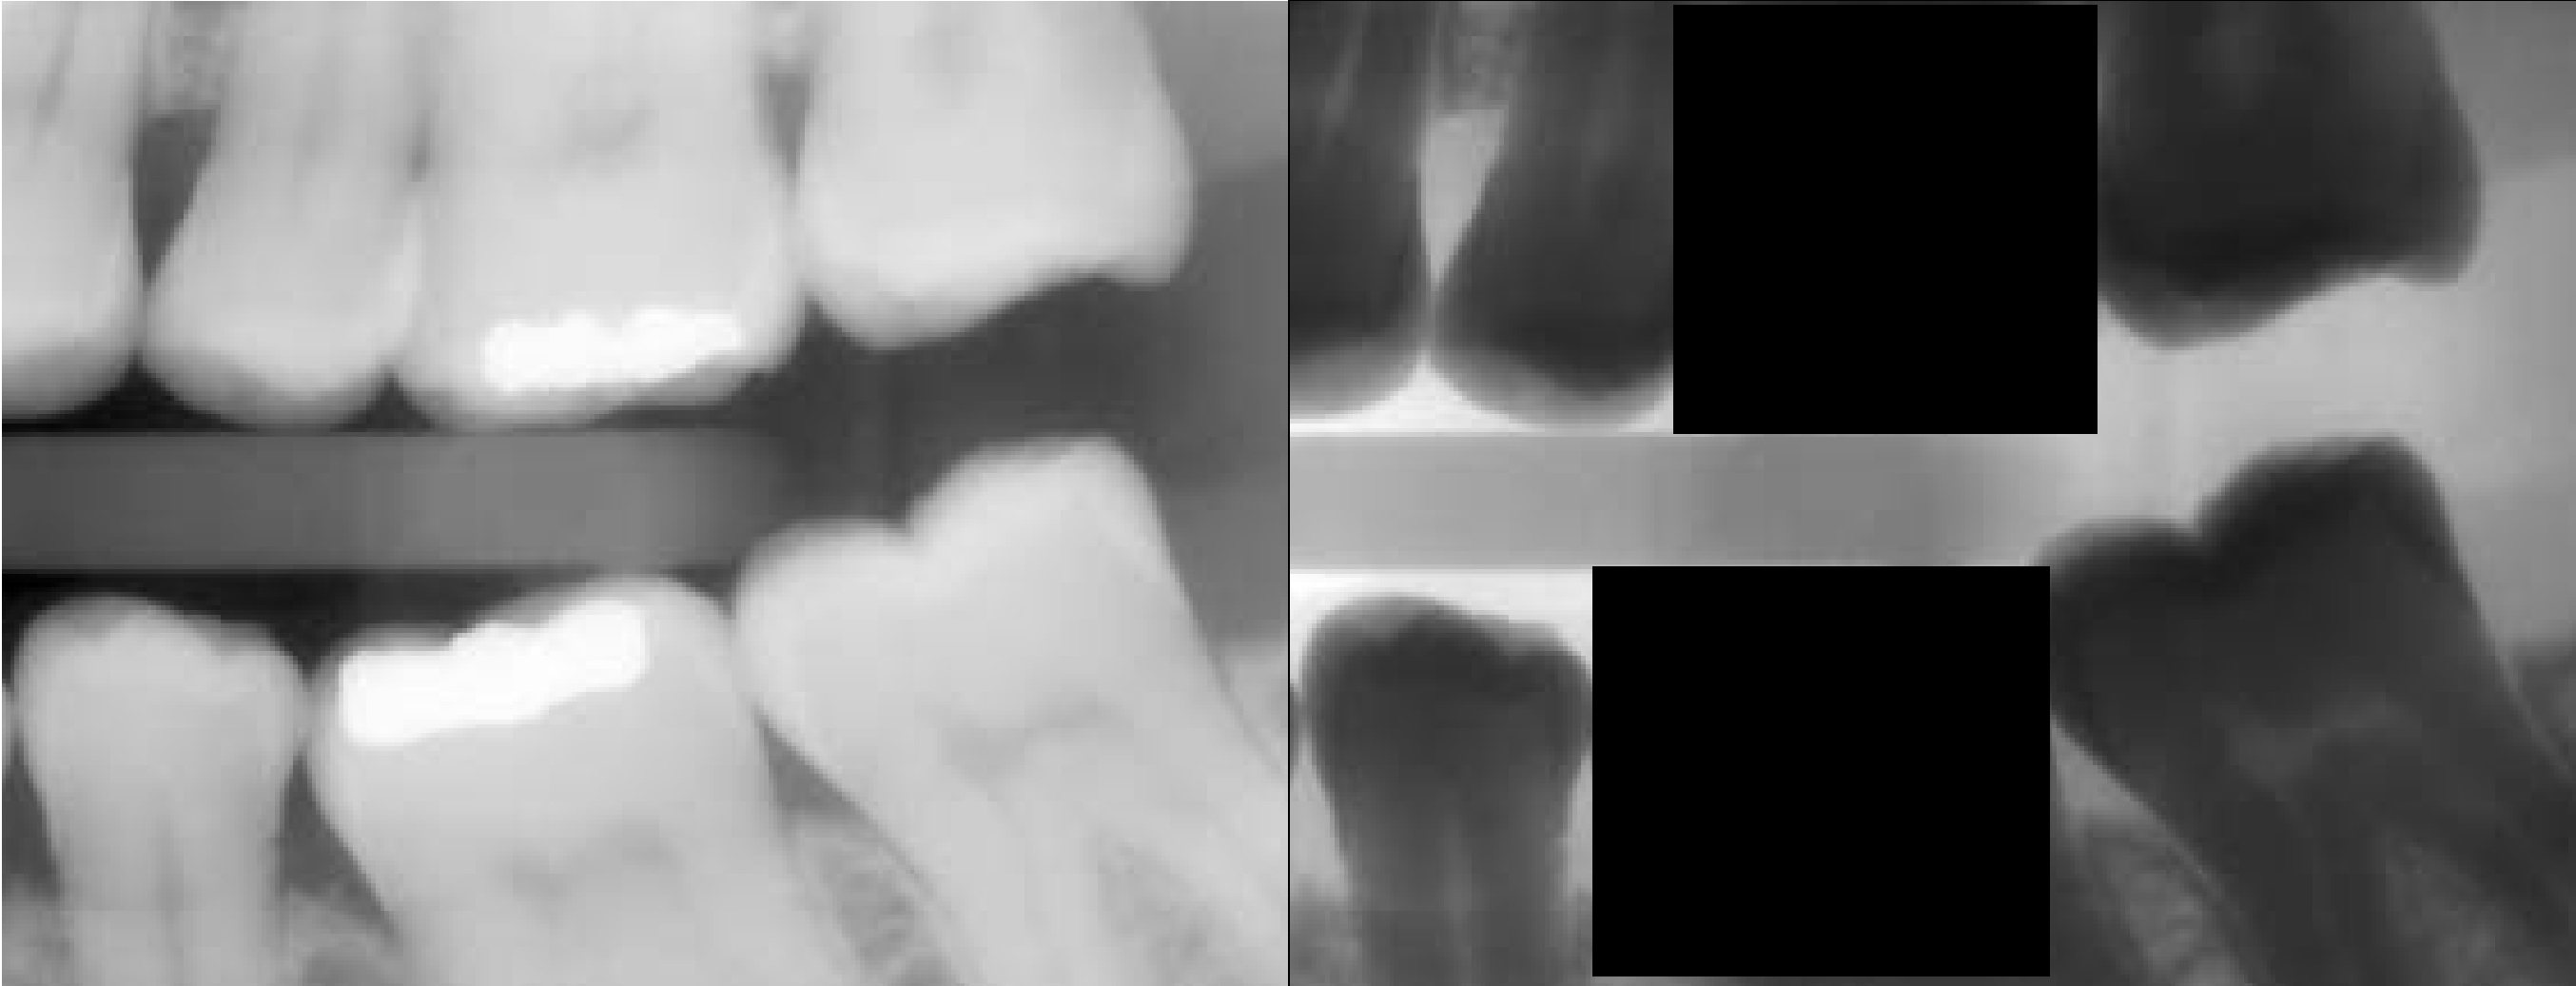

In [8]:
#NOT
img = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/teeth.jpg')

mask_not = np.zeros(img.shape,dtype=np.uint8)
mask_not = cv.rectangle(mask_not,pt1=(320,595),pt2=(800,1025),color=(255,255,255),thickness=-1)

result = ~img & ~mask_not

mask_not1 = cv.rectangle(mask_not,pt1=(405,5),pt2=(850,455),color=(255,255,255),thickness=-1)

result_not1 = ~img & ~mask_not1

final_frame = cv.hconcat((img, result_not1))
cv2_imshow(final_frame)

**Analisis**

Karena masking sendiri adalah yang memfasilitasi flash yang mampu membuat
objek gambar di tampilkan sesuai dengan objek shape yang di tentukan. Cara
kerjanya yaitu menampilkan bidang yang tertutup dan menyembunyikan bidang
yang terbuka atau layer utama ditutup oleh layer objek yang dibuat dalam layer
berbeda. Untuk contoh nya seperti pada operator diatas yaitu mengugnakan
operator AND, OR, NOT, NAND dan XOR